In [67]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline



In [3]:
data=pd.read_csv("data.csv")

C:\Users\gaurav\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


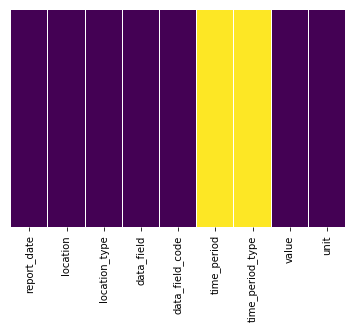

In [4]:

sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')
data.drop(["time_period_type","time_period"],axis=1,inplace=True)


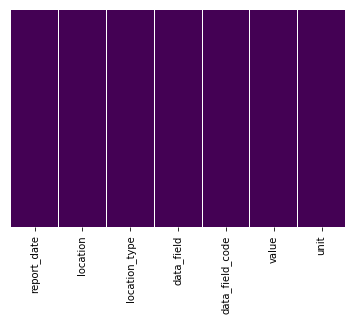

In [5]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [94]:
data.isnull().sum()

data["value"]=pd.to_numeric(data["value"],errors="coerce")


In [95]:
data.isnull().sum()

report_date        0
location           0
location_type      0
data_field         0
data_field_code    0
value              0
unit               0
dtype: int64

In [7]:
data.isnull().sum()
mean=data.value.mean()
data.value.fillna(mean,inplace=True)

In [8]:

data.isnull().sum()

report_date        7
location           7
location_type      7
data_field         7
data_field_code    7
value              0
unit               7
dtype: int64

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107619 entries, 0 to 107618
Data columns (total 7 columns):
report_date        107612 non-null object
location           107612 non-null object
location_type      107612 non-null object
data_field         107612 non-null object
data_field_code    107612 non-null object
value              107619 non-null float64
unit               107612 non-null object
dtypes: float64(1), object(6)
memory usage: 5.7+ MB


In [12]:
data.dropna(axis=0,how='any',inplace=True)

In [105]:
data.isnull().sum()

report_date        0
location           0
location_type      0
data_field         0
data_field_code    0
value              0
unit               0
dtype: int64

In [154]:
data.head()

report_date                location location_type  \
0  2016-03-19  Argentina-Buenos_Aires      province   
1  2016-03-19  Argentina-Buenos_Aires      province   
2  2016-03-19  Argentina-Buenos_Aires      province   
3  2016-03-19  Argentina-Buenos_Aires      province   
4  2016-03-19  Argentina-Buenos_Aires      province   

                            data_field data_field_code  value   unit  
0     cumulative_confirmed_local_cases          AR0001    0.0  cases  
1      cumulative_probable_local_cases          AR0002    0.0  cases  
2  cumulative_confirmed_imported_cases          AR0003    2.0  cases  
3   cumulative_probable_imported_cases          AR0004    1.0  cases  
4         cumulative_cases_under_study          AR0005  127.0  cases

1. show data field code 'AR0005' values for 'Argentina-Catamarca' for entire duration

In [15]:
df1=data[(data["location"]=='Argentina-Catamarca' ) & (data["data_field_code"]=="AR0005")]

In [16]:
ans=df1[["report_date","value"]]

In [17]:
ans.reset_index().drop("index",axis=1)

report_date  value
0   2016-03-19   14.0
1   2016-03-26   15.0
2   2016-04-02   15.0
3   2016-04-09   15.0
4   2016-04-16   15.0
5   2016-04-29   15.0
6   2016-05-07   16.0
7   2016-05-14   15.0
8   2016-05-22   16.0
9   2016-05-30   15.0
10  2016-06-06   15.0
11  2016-06-13   15.0
12  2016-06-18   15.0
13  2016-06-26   16.0

In [104]:
data.report_date=pd.to_datetime(data.report_date,errors="coerce")
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 107372 entries, 0 to 107618
Data columns (total 7 columns):
report_date        107372 non-null datetime64[ns]
location           107372 non-null object
location_type      107372 non-null object
data_field         107372 non-null object
data_field_code    107372 non-null object
value              107372 non-null float64
unit               107372 non-null object
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 6.6+ MB


2. Plot 'Argentina-CABA' and 'Argentina-Catamarca' for number of cases values for entire duration to identify the difference.¶
HINT : Plot sum of the 'value' where 'units' = 'cases' to identify the difference for the locations 'Argentina-CABA' and 'Argentina-Catamarca' for entire duration

In [20]:
df2=data[(data["location"]=='Argentina-Catamarca') | (data["location"]=='Argentina-CABA')]

In [21]:
df2=df2.sort_values(by=["location","report_date"])


In [22]:
data.dropna(axis=0,how='any',inplace=True)

In [23]:
data.isnull().sum()

report_date        0
location           0
location_type      0
data_field         0
data_field_code    0
value              0
unit               0
dtype: int64

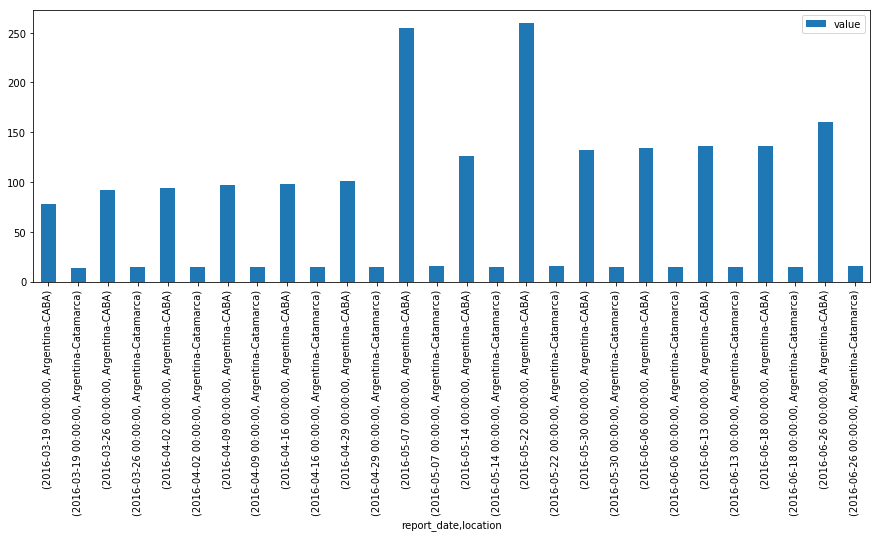

In [62]:
df2.groupby(["report_date","location"]).sum().plot(kind="bar",figsize=(15,5))

In [68]:
pltp=df2.groupby(["report_date","location"]).sum()

In [69]:
pltp.reset_index(inplace=True)


In [86]:
plt1=pltp[pltp.location=="Argentina-CABA"]
plt2=pltp[pltp.location=="Argentina-Catamarca"]
plt2["value"]

1     14.0
3     15.0
5     15.0
7     15.0
9     15.0
11    15.0
13    16.0
15    15.0
17    16.0
19    15.0
21    15.0
23    15.0
25    15.0
27    16.0
Name: value, dtype: float64

Text(0.5,1,'Argentina-Catamarca')

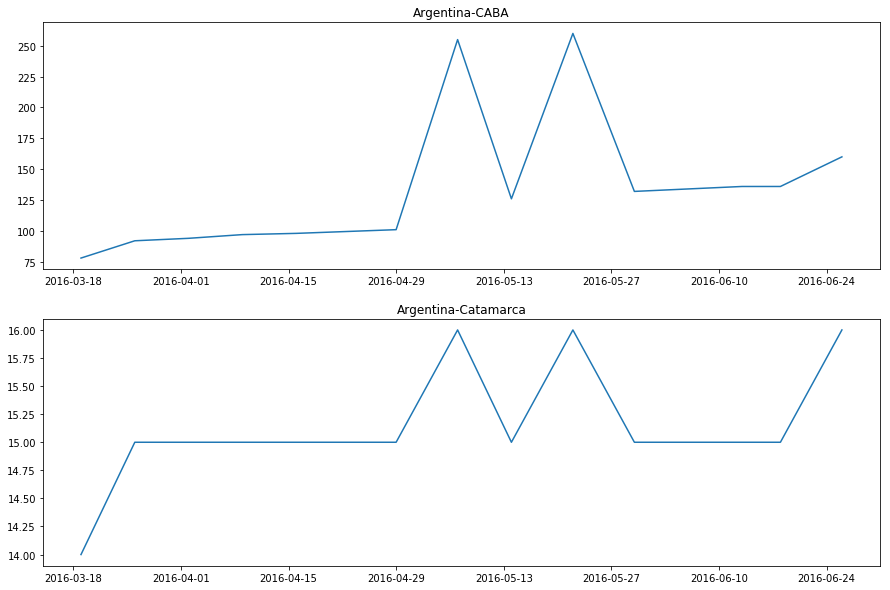

In [80]:
fig=plt.figure()
fig.set_size_inches(15,10)
mon=list(plt1.report_date)

plt_a=fig.add_subplot(2,1,1)
plt_a.plot(mon,list(plt1["value"]))
plt_a.set_title("Argentina-CABA")

plt_b=fig.add_subplot(2,1,2)
plt_b.plot(mon,list(plt2["value"]))
plt_b.set_title("Argentina-Catamarca")

In [122]:
new_df2=plt1
new_df2["value2"]=list(plt2["value"])
new_df2.set_index("report_date")
# new_df2.drop(["location"],axis=1,inplace=True)




<class 'pandas.core.frame.DataFrame'>
Int64Index: 14 entries, 0 to 26
Data columns (total 3 columns):
report_date    14 non-null datetime64[ns]
value          14 non-null float64
value2         14 non-null float64
dtypes: datetime64[ns](1), float64(2)
memory usage: 1.1 KB


C:\Users\gaurav\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [143]:
new_df2

report_date  value  value2
0   2016-03-19   78.0    14.0
2   2016-03-26   92.0    15.0
4   2016-04-02   94.0    15.0
6   2016-04-09   97.0    15.0
8   2016-04-16   98.0    15.0
10  2016-04-29  101.0    15.0
12  2016-05-07  255.0    16.0
14  2016-05-14  126.0    15.0
16  2016-05-22  260.0    16.0
18  2016-05-30  132.0    15.0
20  2016-06-06  134.0    15.0
22  2016-06-13  136.0    15.0
24  2016-06-18  136.0    15.0
26  2016-06-26  160.0    16.0

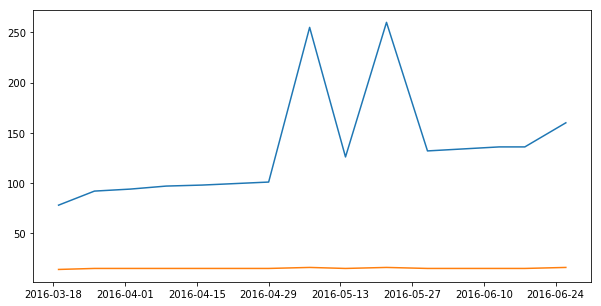

In [149]:
x=list(new_df2.report_date)
y1=list(new_df2.value)
y2=list(new_df2.value2)
fig=plt.figure()
fig.set_size_inches(10,5)

plt.plot(x,y1)
plt.plot(x,y2)
plt.show()

3. Plot how data field values are distributed across the locations 'Argentina-Buenos_Aires', 'Argentina-CABA', 'Argentina-Catamarca

In [32]:
df3=data[(data["location"]=='Argentina-Catamarca') | (data["location"]=='Argentina-CABA') | (data["location"]=='Argentina-Buenos_Aires')]

In [156]:
df3=df3.groupby(["data_field","location"]).sum()

In [160]:
df3=df3.unstack()
df3.reset_index()

data_field level_0                location  cumulative_cases_discarded  \
0            value  Argentina-Buenos_Aires                       251.0   
1            value          Argentina-CABA                        27.0   
2            value     Argentina-Catamarca                         0.0   

data_field  cumulative_cases_under_study  cumulative_confirmed_imported_cases  \
0                                 2981.0                                 32.0   
1                                 1748.0                                124.0   
2                                  212.0                                  0.0   

data_field  cumulative_confirmed_local_cases  \
0                                        0.0   
1                                        0.0   
2                                        0.0   

data_field  cumulative_probable_imported_cases  \
0                                         15.0   
1                                          0.0   
2                                          0.0   

data_field  cumulative_probable_local_cases  
0                                       0.0  
1                                       0.0  
2                                       0.0

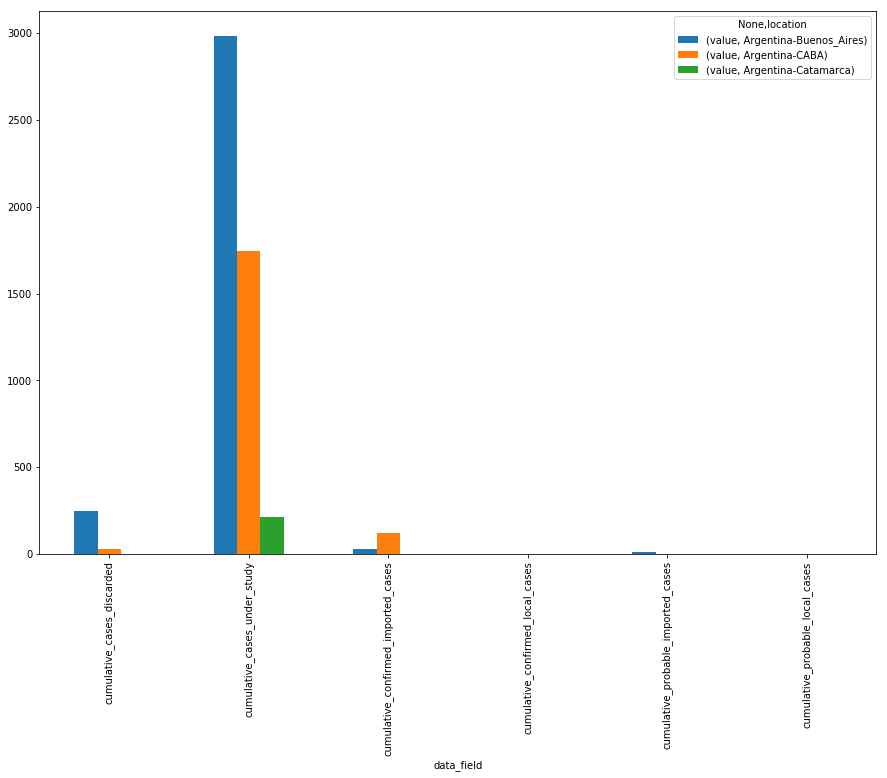

In [168]:
df3.transpose().plot(kind="bar",figsize=(15,10))

4. Build a program to predict the correct word for wrongly typed word. for example whst => what, numbr =>number, good => good¶
Hint : identify most common mistakes that can occur during typing and use big text corpus(big.txt)

In [17]:
def readfile():
    contents=[]
    with open("big.txt","r") as f:
        for line in f:
            li=line.split()
            contents+=(li)
            
        return (set(contents))
        



In [19]:
wordset=readfile()
wordset

{'efficient',
 'good-naturedly,',
 'post,',
 'court.',
 'whatsoever;',
 'asserting',
 'peoples."',
 'twenty-one',
 'spore',
 'immovability',
 'fray',
 'dusk',
 'inspecting',
 'expedition;',
 'inkpot,',
 'fear!"',
 'gummata',
 'forgery',
 'mocking,',
 'grand-patience',
 'paraissent',
 'second."',
 '"EPOCHS',
 'legislation,"',
 'stewart',
 'meek',
 'jerky,"',
 'Bolkhovitinov',
 'urine',
 'thinks;',
 'trotting-horses',
 'thirty-year',
 'baritone',
 'returning.',
 "father's.",
 'Joint',
 'gluteus',
 '"Pierre,',
 'dwelt',
 'violence."',
 'fibroids,',
 'indescribable',
 'finely',
 'wrath.',
 'metropolis',
 'American.',
 'pettifogging',
 'upswing',
 'Swindling',
 'have."',
 'then--a',
 "think,'",
 'boil"',
 'inquiries,',
 'to--"',
 "K.,'",
 'bluff,',
 'companions."',
 'honesty',
 'Some,',
 'handiwork.',
 'enforce,',
 'royalist',
 'WILSON"',
 'absentees,',
 'Ballot.=--A',
 'soon,"',
 'lacerated',
 '_Struggling',
 "Rameau's,",
 'fomented',
 'revolted',
 '"dear',
 "'God's",
 'confession',
 'fly-

In [24]:

from collections import Counter

def words(text): 
    return re.findall(r'\w+', text.lower())

WORDS = Counter(words(open('big.txt').read()))

def Probability(word, N=sum(WORDS.values())): 
    "Probability of `word`."
    return WORDS[word] / N

def final_correction(word): 
    
    return max(poss_correction(word), key=P)

def poss_correction(word): 
    
    return (possible([word]) | possible(edits1(word)) | possible(edits2(word)) | [word])

def possible(words): 
    
    return set(w for w in words if w in WORDS)


correction("gopd")

'good'

In [25]:

correction("gop")

'go'

In [26]:

correction("pd")

'pp'

In [27]:

correction("whst")

'what'

In [28]:
correction("numbr ")

'number'